In [1]:
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/cmc_2.csv')

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df = df[df['brand'] == 'MITSUBISHI']
df = df[df['type2'] == '商車']

In [19]:
df

,year,month,day,brand,origin,type2,type3,type4,number,oil,...,gdp,income average,covid,industry,signal,lead,unemployement,unem,stock,return
130,2012,1,1,MITSUBISHI,國產,商車,輕,VERYCA 1.2,75,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
131,2012,1,1,MITSUBISHI,國產,商車,輕,VERYCA 1.3,83,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
132,2012,1,1,MITSUBISHI,國產,商車,中,CANTER 3.5T,83,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
133,2012,1,1,MITSUBISHI,國產,商車,小,DE 2.4,30,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
134,2012,1,1,MITSUBISHI,國產,商車,小,DET 2.4,63,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176879,2022,3,6,MITSUBISHI,國產,商車,輕,JDP,476,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176880,2022,3,6,MITSUBISHI,國產,商車,輕,JDV,153,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176881,2022,3,6,MITSUBISHI,國產,商車,中,LIFT FB5.0T,82,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176882,2022,3,6,MITSUBISHI,國產,商車,小,DE 2.4,65,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339


In [20]:
group = df.groupby(['year','month'])
group_year = []
group_month = []
group_sum = []
group_oil = []
group_steel = []
group_CPI = []
group_CPIT = []
group_economicgrowth = []
group_gdp = []
group_incomeaverage = []
group_covid = []
group_industry = []
group_stock = []
group_type = []
group_signal = []
group_lead = []
for x,y in group:
    group_year.append(list(group.get_group(x)['year'])[0])
    group_month.append(list(group.get_group(x)['month'])[0])
    group_sum.append(group.get_group(x)['number'].sum())
    group_oil.append(list(group.get_group(x)['oil'])[0])
    group_steel.append(list(group.get_group(x)['steel'])[0])
    group_CPI.append(list(group.get_group(x)['CPI'])[0])
    group_CPIT.append(list(group.get_group(x)['CPIT'])[0])
    group_economicgrowth.append(list(group.get_group(x)['economicgrowth'])[0])
    group_gdp.append(list(group.get_group(x)['gdp'])[0])
    group_incomeaverage.append(list(group.get_group(x)['income average'])[0])
    group_covid.append(list(group.get_group(x)['covid'])[0])
    group_industry.append(list(group.get_group(x)['industry'])[0])
    group_stock.append(list(group.get_group(x)['stock'])[0])
    group_type.append(list(group.get_group(x)['type2'])[0])
    group_signal.append(list(group.get_group(x)['signal'])[0])
    group_lead.append(list(group.get_group(x)['lead'])[0])

In [22]:
df_groupby = pd.DataFrame([group_year,group_month,group_sum,group_oil,group_steel,group_CPI,group_CPIT,group_economicgrowth,group_gdp,group_incomeaverage,
group_covid,group_industry,group_stock,group_signal,group_lead,group_type]).T
df_groupby.columns = ['year','month','sum','oil','steel','CPI','CPIT','economicgrowth','gdp','incomeaverage','covid','industry','stock','signal','lead','type']

In [23]:
df_groupby['year'] = df_groupby['year'].astype(str)
df_groupby['month'] = df_groupby['month'].astype(str)
df_groupby['year'] = df_groupby['year'].apply(lambda x:x.replace('.0',""))
df_groupby['month'] = df_groupby['month'].apply(lambda x:x.replace('.0',""))

In [24]:
df_groupby['date'] = df_groupby['year'] +'/' + df_groupby['month']
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,signal,lead,type,date
0,2012,1,2408,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,商車,2012/1
1,2012,2,1729,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,商車,2012/2
2,2012,3,2274,123.15,24000,95.09,106.86,1.09,0.59,133393.0,0.0,94.57,7933.0,14.0,90.68,商車,2012/3
3,2012,4,1914,119.04,24500,96.09,109.17,1.04,2.6,130318.0,0.0,91.46,7501.72,14.0,90.93,商車,2012/4
4,2012,5,1889,101.75,24500,96.57,108.16,1.04,2.6,130318.0,0.0,94.52,7301.5,15.0,91.01,商車,2012/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021,11,2727,70.83,30479,105.62,107.16,4.86,8.68,214296.0,192.0,137.05,17427.76,37.0,136.44,商車,2021/11
119,2021,12,3372,77.33,30479,105.41,105.62,4.86,8.68,214296.0,441.0,140.78,18218.84,38.0,137.38,商車,2021/12
120,2022,1,2460,92.34,"29,979",106.01,107.46,3.06,NaN,NaN,NaN,138.97,17674.4,36.0,138.32,商車,2022/1
121,2022,2,1640,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,NaN,NaN,商車,2022/2


In [25]:
df_groupby.set_index(pd.to_datetime(df_groupby['date'],format = '%Y/%m'),inplace = True)
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,signal,lead,type,date
date,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,2408,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,商車,2012/1
2012-02-01,2012,2,1729,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,商車,2012/2
2012-03-01,2012,3,2274,123.15,24000,95.09,106.86,1.09,0.59,133393.0,0.0,94.57,7933.0,14.0,90.68,商車,2012/3
2012-04-01,2012,4,1914,119.04,24500,96.09,109.17,1.04,2.6,130318.0,0.0,91.46,7501.72,14.0,90.93,商車,2012/4
2012-05-01,2012,5,1889,101.75,24500,96.57,108.16,1.04,2.6,130318.0,0.0,94.52,7301.5,15.0,91.01,商車,2012/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,2727,70.83,30479,105.62,107.16,4.86,8.68,214296.0,192.0,137.05,17427.76,37.0,136.44,商車,2021/11
2021-12-01,2021,12,3372,77.33,30479,105.41,105.62,4.86,8.68,214296.0,441.0,140.78,18218.84,38.0,137.38,商車,2021/12
2022-01-01,2022,1,2460,92.34,"29,979",106.01,107.46,3.06,NaN,NaN,NaN,138.97,17674.4,36.0,138.32,商車,2022/1


In [26]:
df_groupby['steel'] = df_groupby['steel'].astype(str).apply(lambda x:x.replace(",",'')).astype(float)

In [27]:
#標準化
sc = StandardScaler()
df_groupby['oil_sc'] = sc.fit_transform(df_groupby['oil'].values.reshape(-1,1))
df_groupby['steel_sc'] = sc.fit_transform(df_groupby['steel'].values.reshape(-1,1))
df_groupby['CPI_sc'] = sc.fit_transform(df_groupby['CPI'].values.reshape(-1,1))
df_groupby['CPIT_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['economicgrowth_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['gdp_sc'] = sc.fit_transform(df_groupby['gdp'].values.reshape(-1,1))
df_groupby['incomeaverage_sc'] = sc.fit_transform(df_groupby['incomeaverage'].values.reshape(-1,1))
df_groupby['covid_sc'] = sc.fit_transform(df_groupby['covid'].values.reshape(-1,1))
df_groupby['industry_sc'] = sc.fit_transform(df_groupby['industry'].values.reshape(-1,1))
df_groupby['stock_sc'] = sc.fit_transform(df_groupby['stock'].values.reshape(-1,1))
df_groupby['signal_sc'] = sc.fit_transform(df_groupby['signal'].values.reshape(-1,1))
df_groupby['lead_sc'] = sc.fit_transform(df_groupby['lead'].values.reshape(-1,1))

In [30]:
df_groupby = df_groupby.loc['2012-01-01':'2020-12-01',:]

In [31]:
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,...,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,stock_sc,signal_sc,lead_sc
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,2408,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,...,-1.683748,0.839316,0.839316,7.681146,-1.597193,-0.159479,-1.989291,-1.051194,-1.493940,-1.474838
2012-02-01,2012,2,1729,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,...,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.548578,-0.839213,-1.201201,-1.409417
2012-03-01,2012,3,2274,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,...,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-0.786087,-0.905309,-1.347571,-1.367480
2012-04-01,2012,4,1914,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,...,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.013010,-1.056582,-1.347571,-1.346512
2012-05-01,2012,5,1889,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,...,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.789735,-1.126810,-1.201201,-1.339802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020,8,2091,45.39,22179.0,102.5,98.9,4.31,6.43,187616.0,...,0.815374,-1.370541,-1.370541,-0.130184,1.250774,-0.140315,1.090589,0.728659,0.408868,1.189827
2020-09-01,2020,9,2772,40.29,22179.0,102.4,98.34,4.31,6.43,187616.0,...,0.774605,-1.527587,-1.527587,-0.130184,1.250774,-0.129041,1.347428,0.702057,0.555238,1.379382
2020-10-01,2020,10,2993,36.29,22979.0,102.75,99.1,5.3,7.35,196315.0,...,0.917296,-1.314453,-1.314453,-0.130182,1.707673,-0.111004,1.163555,0.712836,0.701608,1.547129


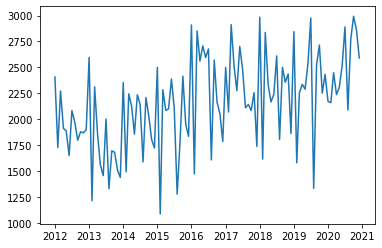

In [32]:
plt.plot(df_groupby.index,df_groupby['sum'])

In [35]:
adfuller(df_groupby['sum'].diff()[1:]) #一街差分定太

(-6.7977674635903025,
 2.277748413868421e-09,
 10,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 1335.5903483899)

In [36]:
df_model = df_groupby.loc[:,['sum','oil_sc','steel_sc','CPI_sc','CPIT_sc','economicgrowth_sc','gdp_sc',
'incomeaverage_sc','covid_sc','industry_sc','stock_sc','signal_sc','lead_sc']]

In [37]:
df_model['oil_sc_last_month'] = df_model['oil_sc'].shift()
df_model['steel_sc_last_month'] = df_model['steel_sc'].shift()
df_model['CPI_sc_last_month'] = df_model['CPI_sc'].shift()
df_model['economicgrowth_sc_last_month'] = df_model['economicgrowth_sc'].shift()
df_model['gdp_sc_last_month'] = df_model['gdp_sc'].shift()
df_model['incomeaverage_sc_last_month'] = df_model['incomeaverage_sc'].shift()
df_model['covid_sc_last_month'] = df_model['covid_sc'].shift()
df_model['industry_sc_last_month'] = df_model['industry_sc'].shift()
df_model['stock_sc_last_month'] = df_model['stock_sc'].shift()
df_model['CPIT_sc_last_month'] = df_model['CPIT_sc'].shift()
df_model['last_sell'] = df_model['sum'].shift()
df_model['signal_sc_last_month'] = df_model['signal_sc'].shift()
df_model['lead_sc_last_month'] = df_model['lead_sc'].shift()

In [39]:
#將第一列的空值排除
df_model = df_model.iloc[1:,:]

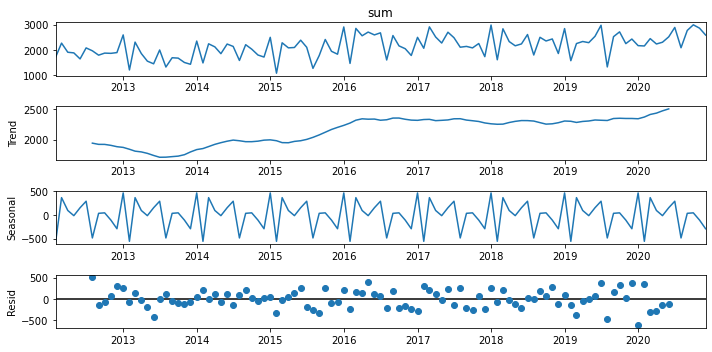

<Figure size 2880x720 with 0 Axes>

In [40]:
result = seasonal_decompose(df_model['sum'],model='additive', period=12)
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [42]:
#build model
auto_arima(df_groupby['sum'].diff()[1:],seasonal=True,m =12,stepwise = True,max_p = 3).summary() #12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  107
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -761.137
Date:                            Sun, 22 May 2022   AIC                           1532.274
Time:                                    03:45:01   BIC                           1545.638
Sample:                                         0   HQIC                          1537.692
                                            - 107                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2351      0.140     -1.678      0.093      -0.510       0.040
ma.L1         -0.6777      0.097     -6.980      0.000      -0.868      -0.487
ar.S.L12       0.8589      0.073     11.728      0.000       0.715       1.002
ma.S.L12      -0.4200      0.163     -2.578      0.010      -0.739      -0.101
sigma2      8.151e+04   1.38e+04      5.928      0.000    5.46e+04    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.92   Prob(JB):                         0.24
Heteroskedasticity (H):               1.46   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# 10210112
ans_ans = []
for x in range(70,len(df_model.index)-1):  #4
    s = SARIMAX(
                df_model.loc[:df_model.index[x],'sum'].astype(int).values,
                order = (1,0,1),
                seasonal_order=(1,0,1,12),
                exog = df_model.loc[:df_model.index[x],[                                
                                    'CPI_sc_last_month',
                                    'last_sell',
                                    'stock_sc_last_month',
                                    'incomeaverage_sc_last_month']].astype(float),
                trend = 'ct',
                time_varying_regression=False,
                mle_regression=False,
                measurement_error = True,
                enforce_stationary = False
            )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model.loc[df_model.index[x+1],[
                                 'CPI_sc_last_month',
                                 'last_sell',
                                 'stock_sc_last_month',
                                 'incomeaverage_sc_last_month']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66041D+00    |proj g|=  1.26917D+00

At iterate    5    f=  7.01036D+00    |proj g|=  2.03250D-02

At iterate   10    f=  7.00994D+00    |proj g|=  2.99601D-02

At iterate   15    f=  7.00981D+00    |proj g|=  3.11184D-02
  ys=-1.114E-05  -gs= 4.729E-06 BFGS update SKIPPED

At iterate   20    f=  7.00970D+00    |proj g|=  2.45383D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  7.00963D+00    |proj g|=  2.01093D-02

At iterate   30    f=  7.00945D+00    |proj g|=  2.98443D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.00917D+00    |proj g|=  1.01926D-02

At iterate   40    f=  7.00873D+00    |proj g|=  1.64498D-02

At iterate   45    f=  7.00860D+00    |proj g|=  3.71875D-02

At iterate   50    f=  6.99458D+00    |proj g|=  1.37535D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    218      3     1     0   1.375D-01   6.995D+00
  F =   6.9945773912527942     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41227D+00    |proj g|=  8.22936D-01

At iterate    5    f=  7.05058D+00    |proj g|=  5.16940D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     30      1     0     0   4.430D-02   7.051D+00
  F =   7.0505791058309706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 v

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.07510D+00    |proj g|=  6.81448D-02

At iterate   10    f=  7.06773D+00    |proj g|=  1.21461D-02
  ys=-3.056E-03  -gs= 2.001E-03 BFGS update SKIPPED

At iterate   15    f=  7.06454D+00    |proj g|=  2.83185D-02

At iterate   20    f=  7.06403D+00    |proj g|=  2.15459D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     59      1     1     0   2.155D-02   7.064D+00
  F =   7.0640299600227410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.06235D+00    |proj g|=  2.82500D-02
  ys=-3.662E-05  -gs= 3.722E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     59      1     1     0   3.242D-02   7.062D+00
  F =   7.0617149403516200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05357D+00    |proj g|=  1.76772D+00

At iterate    5    f=  7.12238D+00    |proj g|=  8.90494D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  7.08342D+00    |proj g|=  3.88874D-02

At iterate   15    f=  7.07194D+00    |proj g|=  3.95330D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.06608D+00    |proj g|=  6.33734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     71      2     0     0   2.511D-02   7.066D+00
  F =   7.0657518195749907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00063D+00    |proj g|=  1.48552D+00

At iterate    5    f=  7.12069D+00    |proj g|=  8.79640D-02

At iterate   10    f=  7.09239D+00    |proj g|=  1.74550D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


  ys=-3.790E-08  -gs= 2.433E-07 BFGS update SKIPPED

At iterate   15    f=  7.06741D+00    |proj g|=  7.39517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     51      1     1     0   7.395D-02   7.067D+00
  F =   7.0674086624398269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84530D+00    |proj g|=  2.99334D+00

At iterate    5    f=  7.18793D+00    |proj g|=  9.88698D-02

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


  ys=-1.968E-06  -gs= 9.359E-05 BFGS update SKIPPED

At iterate   15    f=  7.05909D+00    |proj g|=  2.93870D-02

At iterate   20    f=  7.05872D+00    |proj g|=  6.15109D-02

At iterate   25    f=  7.05867D+00    |proj g|=  5.15679D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     93      1     1     0   5.157D-02   7.059D+00
  F =   7.0586702000576951     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.07020D+00    |proj g|=  5.13975D-02

At iterate   25    f=  7.06583D+00    |proj g|=  1.67126D-02

At iterate   30    f=  7.06542D+00    |proj g|=  3.05037D-02

At iterate   35    f=  7.06529D+00    |proj g|=  3.18833D-02

At iterate   40    f=  7.06527D+00    |proj g|=  4.01276D-02

At iterate   45    f=  7.05881D+00    |proj g|=  9.86258D-02

At iterate   50    f=  7.03722D+00    |proj g|=  4.38314D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    134      1     0     0   4.383D-02   7.037D+00
  F =   7.0372184752096771     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  7.09352D+00    |proj g|=  9.01232D-02

At iterate   10    f=  7.08220D+00    |proj g|=  4.57502D-02

At iterate   15    f=  7.07403D+00    |proj g|=  8.48193D-02

At iterate   20    f=  7.06649D+00    |proj g|=  4.36207D-02

At iterate   25    f=  7.05996D+00    |proj g|=  2.76340D-02

At iterate   30    f=  7.05975D+00    |proj g|=  2.17296D-02

At iterate   35    f=  7.05971D+00    |proj g|=  3.16835D-02
  ys=-2.958E-08  -gs= 1.904E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36    100      1     1     0   3.168D-02   7.060D+00
  F =   7.0597109153145752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61004D+00    |proj g|=  2.63009D+00

At iterate    5    f=  7.10433D+00    |proj g|=  9.12217D-02

At iterate   10    f=  7.06077D+00    |proj g|=  3.21442D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     56      2     0     0   2.700D-02   7.060D+00
  F =   7.0600660771656774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62774D+00    |proj g|=  2.63922D+00

At iterate    5    f=  7.11332D+00    |proj g|=  9.56029D-02

At iterate   10    f=  7.06979D+00    |proj g|=  1.11144D-01

At iterate   15    f=  7.05835D+00    |proj g|=  3.65875D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

    8     22     78      2     0     0   3.816D-02   7.056D+00
  F =   7.0563545963644678     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67683D+00    |proj g|=  2.66074D+00

At iterate    5    f=  7.40063D+00    |proj g|=  1.20638D-01

At iterate   10    f=  7.39382D+00    |proj g|=  1.82805D-02

At iterate   15    f=  7.30032D+00    |proj g|=  4.23878D-01

At iterate   20    f=  7.09815D+00    |proj g|=  7.05755D-02

At iterate   25    f=  7.08906D+00    |proj g|=  7.98214D-02

At iterate   30    f=  7.07451D+00    |proj g|=  4.97088D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     76      1     0     0   5.539D-02   7.071D+00
  F =   7.0713478918980632     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.70507D+00    |proj g|=  8.19736D-01

At iterate    5    f=  7.14603D+00    |proj g|=  5.86469D-02

At iterate   10    f=  7.07665D+00    |proj g|=  3.74516D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.69681D+00    |proj g|=  7.82256D-01

At iterate    5    f=  7.11488D+00    |proj g|=  2.22174D-02

At iterate   10    f=  7.11391D+00    |proj g|=  3.02679D-02

At iterate   15    f=  7.11301D+00    |proj g|=  2.64248D-02

At iterate   20    f=  7.10806D+00    |proj g|=  2.70990D-02

At iterate   25    f=  7.10622D+00    |proj g|=  6.53724D-02

At iterate   30    f=  7.10305D+00    |proj g|=  2.01744D-02

At iterate   35    f=  7.10226D+00    |proj g|=  5.41767D-02

At iterate   40    f=  7.09942D+00    |proj g|=  2.51849D-02

At iterate   45    f=  7.09865D+00    |proj g|=  3.62180D-02

At iterate   50    f=  7.09842D+00    |proj g|=  3.76371D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.13067D+00    |proj g|=  4.84170D-02

At iterate   10    f=  7.11862D+00    |proj g|=  3.08225D-02

At iterate   15    f=  7.11610D+00    |proj g|=  4.94293D-02

At iterate   20    f=  7.11595D+00    |proj g|=  2.98730D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  7.10175D+00    |proj g|=  1.96693D-02

At iterate   30    f=  7.09981D+00    |proj g|=  2.22159D-02

At iterate   35    f=  7.09919D+00    |proj g|=  1.84394D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   40    f=  7.09907D+00    |proj g|=  1.64103D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    173      3     0     0   1.641D-02   7.099D+00
  F =   7.0990697161096419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24583D+00    |proj g|=  2.40382D-01

At iterate    5    f=  7.12763D+00    |proj g|=  5.61641D-02

At iterate   10    f=  7.10830D+00    |proj g|=  3.97985D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f=  7.09650D+00    |proj g|=  2.67118D-02

At iterate   45    f=  7.09588D+00    |proj g|=  2.87971D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47    129      2     0     0   2.235D-02   7.096D+00
  F =   7.0958792175540264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28208D+00    |proj g|=  2.56938D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.13175D+00    |proj g|=  4.61512D-02

At iterate   10    f=  7.11218D+00    |proj g|=  2.40838D-02

At iterate   15    f=  7.09505D+00    |proj g|=  2.44305D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     35      1     0     0   2.443D-02   7.095D+00
  F =   7.0950504291879328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26252D+00    |proj g|=  1.97799D-01

At iterate    5    f=  7.12761D+00    |proj g|=  2.36288D-02

At iterate   10    f=  7.09999D+00    |proj g|=  4.40232D-02

At iterate   15    f=  7.09375D+00    |proj g|=  1.47068D-02

At iterate   20    f=  7.09327D+00    |proj g|=  3.42011D-02

At iterate   25    f=  7.09317D+00    |proj g|=  2.02667D-02

At iterate   30    f=  7.09148D+00    |proj g|=  2.84364D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   35    f=  7.06060D+00    |proj g|=  3.06014D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35    101      1     0     0   3.060D-02   7.061D+00
  F =   7.0605951356211980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24572D+00    |proj g|=  1.22240D-01

At iterate    5    f=  7.12584D+00    |proj g|=  1.88544D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  7.09538D+00    |proj g|=  1.94930D-02

At iterate   15    f=  7.09530D+00    |proj g|=  1.26771D-02
  ys=-1.135E-07  -gs= 1.459E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     82      2     1     0   2.398D-02   7.095D+00
  F =   7.0952986630742343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32496D+00    |proj g|=  3.52924D-01

At iterate    5    f=  7.17205D+00    |proj g|=  1.05319D-01

At iterate   10    f=  7.15750D+00    |proj g|=  4.82986D-02
  ys=-6.137E-08  -gs= 7.109E-08 BFGS update SKIPPED

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  7.15302D+00    |proj g|=  2.81854D-02

At iterate   15    f=  7.14992D+00    |proj g|=  3.00427D-02

At iterate   20    f=  7.14803D+00    |proj g|=  2.93807D-02

At iterate   25    f=  7.14693D+00    |proj g|=  1.44826D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     68      1     0     0   1.448D-02   7.147D+00
  F =   7.1469337552974199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.15611D+00    |proj g|=  1.73975D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   25    f=  7.15585D+00    |proj g|=  2.30327D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     97      3     0     0   2.303D-02   7.156D+00
  F =   7.1558516875508618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26716D+00    |proj g|=  2.19363D-01

At iterate    5    f=  7.19077D+00    |proj g|=  2.75983D-02

At iterate   10    f=  7.18302D+00    |proj g|=  1.23136D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42    132      2     0     0   3.279D-02   7.155D+00
  F =   7.1554550280467266     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22006D+00    |proj g|=  1.77995D-01

At iterate    5    f=  7.16981D+00    |proj g|=  1.05760D-02

At iterate   10    f=  7.16329D+00    |proj g|=  2.61811D-02

At iterate   15    f=  7.14806D+00    |proj g|=  2.56809D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21611D+00    |proj g|=  1.76234D-01

At iterate    5    f=  7.16855D+00    |proj g|=  2.73545D-02

At iterate   10    f=  7.16321D+00    |proj g|=  2.76010D-02

At iterate   15    f=  7.16255D+00    |proj g|=  2.92153D-02

At iterate   20    f=  7.15851D+00    |proj g|=  2.27535D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     78      1     0     0   4.202D-02   7.159D+00
  F =   7.1585096364977270     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19030D+00    |proj g|=  1.38654D-01

At iterate    5    f=  7.15517D+00    |proj g|=  2.26018D-02

At iterate   10    f=  7.15236D+00    |proj g|=  4.87475D-02

At iterate   15    f=  7.14736D+00    |proj g|=  2.91815D-02

At iterate   20    f=  7.14556D+00    |proj g|=  4.45788D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     66      1     0     0   3.618D-02   7.145D+00
  F =   7.1451755795252359     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17635D+00    |proj g|=  1.05907D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.14580D+00    |proj g|=  1.19193D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     36      2     0     0   1.192D-02   7.146D+00
  F =   7.1457955317762121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18753D+00    |proj g|=  1.33045D-01

At iterate    5    f=  7.14593D+00    |proj g|=  4.54589D-02

At iterate   10    f=  7.14247D+00    |proj g|=  3.02092D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.12401D+00    |proj g|=  2.05867D-02

At iterate   20    f=  7.12377D+00    |proj g|=  2.48758D-02

At iterate   25    f=  7.12343D+00    |proj g|=  2.06112D-02

At iterate   30    f=  7.12298D+00    |proj g|=  2.39463D-02

At iterate   35    f=  7.12253D+00    |proj g|=  3.40753D-02

At iterate   40    f=  7.12173D+00    |proj g|=  1.43100D-02

At iterate   45    f=  7.12128D+00    |proj g|=  1.51382D-02

At iterate   50    f=  7.09896D+00    |proj g|=  7.17451D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     94      1     0     0   7.175D-02   7.099D+00
  F =   7.09896406164

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17338D+00    |proj g|=  1.55242D-01

At iterate    5    f=  7.12862D+00    |proj g|=  3.10758D-02

At iterate   10    f=  7.12145D+00    |proj g|=  4.26928D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     38      1     0     0   1.978D-02   7.119D+00
  F =   7.1186988175759103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17292D+00    |proj g|=  1.71402D-01

At iterate    5    f=  7.12545D+00    |proj g|=  1.60976D-02

At iterate   10    f=  7.12388D+00    |proj g|=  2.30564D-02

At iterate   15    f=  7.11608D+00    |proj g|=  1.70897D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f=  7.11506D+00    |proj g|=  1.57491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    106      2     0     0   3.256D-02   7.115D+00
  F =   7.1149363888887862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18556D+00    |proj g|=  2.10649D-01

At iterate    5    f=  7.13710D+00    |proj g|=  1.03046D-02

At iterate   10    f=  7.13280D+00    |proj g|=  2.57737D-02

At iterate   15    f=  7.12889D+00    |proj g|=  2.49103D-02

At iterate   20    f=  7.12813D+00    |proj g|=  1.74815D-02

At iterate   25    f=  7.12754D+00    |proj g|=  1.74951D-02

At iterate   30    f=  7.12705D+00    |proj g|=  1.60326D-02

At iterate   35    f=  7.12662D+00    |proj g|=  1.83707D-02

At iterate   40    f=  7.12267D+00    |proj g|=  2.33898D-02

At iterate   45    f=  6.98365D+00    |proj g|=  1.21810D-01

At iterate   50    f=  6.95222D+00    |proj g|=  5.28136D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.10444D+00    |proj g|=  9.58039D-03

At iterate   10    f=  7.10353D+00    |proj g|=  8.56557D-03

At iterate   15    f=  7.09830D+00    |proj g|=  1.78224D-02

At iterate   20    f=  7.09817D+00    |proj g|=  3.36410D-02

At iterate   25    f=  7.09744D+00    |proj g|=  4.23168D-02

At iterate   30    f=  7.09698D+00    |proj g|=  1.88514D-02

At iterate   35    f=  7.09537D+00    |proj g|=  2.99122D-02

At iterate   40    f=  7.09495D+00    |proj g|=  5.41716D-02

At iterate   45    f=  7.09381D+00    |proj g|=  4.01730D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   50    f=  7.09104D+00    |proj g|=  8.79805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    126      1     0     0   8.798D-03   7.091D+00
  F =   7.0910417991049322     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14623D+00    |proj g|=  1.45678D-01

At iterate    5    f=  7.10315D+00    |proj g|=  1.82511D-02

At iterate   10    f=  7.10239D+00    |proj g|=  5.11035D-02

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.09472D+00    |proj g|=  1.56662D-02

At iterate   20    f=  7.09444D+00    |proj g|=  1.28311D-02

At iterate   25    f=  7.09436D+00    |proj g|=  1.06355D-02

At iterate   30    f=  7.07678D+00    |proj g|=  6.72095D-02

At iterate   35    f=  6.98080D+00    |proj g|=  1.01095D-01

At iterate   40    f=  6.93229D+00    |proj g|=  1.17912D-01

At iterate   45    f=  6.92733D+00    |proj g|=  1.04907D-01

At iterate   50    f=  6.92454D+00    |proj g|=  1.98715D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     99      1     0     0   1.987D-02   6.925D+00
  F =   6.92453777155

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
error_percent = np.mean(np.abs(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

Text(0.5, 1.0, 'mape:0.145')

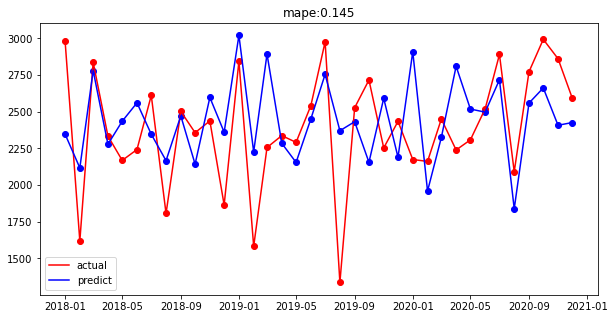

In [46]:
plt.plot(df_model.loc['2018-01-01':'2020-12-01','sum'].index,df_model.loc['2018-01-01':'2020-12-01','sum'],color = 'red')
plt.plot(df_model.index[71:107],ans_ans,color = 'blue') #3
plt.scatter(df_model.loc['2018-01-01':'2020-12-01','sum'].index,df_model.loc['2018-01-01':'2020-12-01','sum'], color = 'red')
plt.scatter(df_model.index[71:107],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])
plt.title('mape:'+str(error_percent.round(3)))

In [136]:
# 10210112

# 將 seasonal q 調 8
ans_ans = []
for x in range(70,len(df_model.index)-1):  #4
    if x < 85:
        s = SARIMAX(
                    df_model.loc[:df_model.index[x],'sum'].astype(int).values,
                    order = (1,1,3),
                    seasonal_order=(1,0,1,12),
                    exog = df_model.loc[:df_model.index[x],[                                
                                        'CPI_sc_last_month',
                                        'economicgrowth_sc_last_month',
                                        'incomeaverage_sc',
                                        'industry_sc',
                                        'last_sell']].astype(float),
                    trend = 'n',
                    time_varying_regression=True,
                    mle_regression=False,
                    measurement_error = True,
                    enforce_stationary = False
                )
    else:
        s = SARIMAX(
                    df_model.loc[df_model.index[x-60]:df_model.index[x],'sum'].astype(int).values,
                    order = (1,1,1),
                    seasonal_order=(1,0,1,12),
                    exog = df_model.loc[df_model.index[x-60]:df_model.index[x],[                                
                                        'CPI_sc_last_month',
                                        'economicgrowth_sc_last_month',
                                        'incomeaverage_sc',
                                        'industry_sc',
                                        'last_sell']].astype(float),
                    trend = 'c',
                    time_varying_regression=False,
                    mle_regression=False,
                    measurement_error = True,
                    enforce_stationary = False
                )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model.loc[df_model.index[x+1],[
                                 'CPI_sc_last_month',
                                 'stock_sc_last_month',
                                 'incomeaverage_sc',
                                 'industry_sc',
                                 'last_sell']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00934D+00    |proj g|=  7.86358D-01

At iterate    5    f=  6.75347D+00    |proj g|=  2.99384D-01

At iterate   10    f=  6.71892D+00    |proj g|=  1.73722D-01

At iterate   15    f=  6.71099D+00    |proj g|=  2.78663D-02

At iterate   20    f=  6.69307D+00    |proj g|=  3.99173D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  6.68822D+00    |proj g|=  3.10218D-01

At iterate   30    f=  6.68580D+00    |proj g|=  3.43462D-02

At iterate   35    f=  6.68524D+00    |proj g|=  3.93999D-02

At iterate   40    f=  6.68514D+00    |proj g|=  6.54515D-02

At iterate   45    f=  6.68444D+00    |proj g|=  7.77633D-02
  ys=-2.986E-03  -gs= 3.049E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     46    109      2     1     0   7.776D-02   6.684D+00
  F =   6.6844380146593263     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03685D+00    |proj g|=  7.63823D-01

At iterate    5    f=  6.74481D+00    |proj g|=  1.90133D-01

At iterate   10    f=  6.73689D+00    |proj g|=  8.70928D-02

At iterate   15    f=  6.73468D+00    |proj g|=  5.67299D-02

At iterate   20    f=  6.71926D+00    |proj g|=  5.32513D-02

At iterate   25    f=  6.71154D+00    |proj g|=  9.78094D-02

At iterate   30    f=  6.70941D+00    |proj g|=  4.65309D-02

At iterate   35    f=  6.70910D+00    |proj g|=  4.06335D-02

At iterate   40    f=  6.70901D+00    |proj g|=  2.72610D-02

At iterate   45    f=  6.70898D+00    |proj g|=  4.13042D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   50    f=  6.70894D+00    |proj g|=  9.07758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50    102      1     0     0   9.078D-02   6.709D+00
  F =   6.7089420526188066     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05165D+00    |proj g|=  7.65588D-01

At iterate    5    f=  6.74478D+00    |proj g|=  3.72782D-01

At iterate   10    f=  6.74107D+00    |proj g|=  4.94787D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.82261D+00    |proj g|=  9.51486D-01

At iterate   10    f=  6.73208D+00    |proj g|=  1.18698D-01

At iterate   15    f=  6.72314D+00    |proj g|=  3.25276D-01

At iterate   20    f=  6.71102D+00    |proj g|=  7.59735D-02

At iterate   25    f=  6.71002D+00    |proj g|=  6.99770D-02

At iterate   30    f=  6.70982D+00    |proj g|=  8.68825D-02

At iterate   35    f=  6.70981D+00    |proj g|=  2.75663D-02

At iterate   40    f=  6.70981D+00    |proj g|=  2.18572D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     42    125      2     0     0   7.285D-02   6.710D+00
  F =   6.7098074436420001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05778D+00    |proj g|=  7.84065D-01

At iterate    5    f=  6.83055D+00    |proj g|=  3.38822D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.72831D+00    |proj g|=  1.73982D-01

At iterate   15    f=  6.71626D+00    |proj g|=  6.24483D-02

At iterate   20    f=  6.71406D+00    |proj g|=  4.59539D-02

At iterate   25    f=  6.71247D+00    |proj g|=  1.40735D-01

At iterate   30    f=  6.70984D+00    |proj g|=  5.30783D-02
  ys=-1.937E-05  -gs= 1.816E-05 BFGS update SKIPPED

At iterate   35    f=  6.70970D+00    |proj g|=  8.83967D-03

At iterate   40    f=  6.70958D+00    |proj g|=  7.16273D-02

At iterate   45    f=  6.70948D+00    |proj g|=  3.93840D-02

At iterate   50    f=  6.70940D+00    |proj g|=  1.50831D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.83608D+00    |proj g|=  2.33871D-01

At iterate   10    f=  6.76571D+00    |proj g|=  4.71475D-01

At iterate   15    f=  6.74911D+00    |proj g|=  2.30831D-01

At iterate   20    f=  6.74803D+00    |proj g|=  3.38587D-02

At iterate   25    f=  6.74785D+00    |proj g|=  3.54235D-02

At iterate   30    f=  6.74781D+00    |proj g|=  3.00160D-02

At iterate   35    f=  6.74758D+00    |proj g|=  3.67157D-02

At iterate   40    f=  6.74691D+00    |proj g|=  3.17107D-02

At iterate   45    f=  6.74652D+00    |proj g|=  5.90877D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.74604D+00    |proj g|=  2.07092D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50    128      2     0     0   2.071D-02   6.746D+00
  F =   6.7460437803896580     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06795D+00    |proj g|=  7.94498D-01

At iterate    5    f=  6.84178D+00    |proj g|=  8.09704D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.83418D+00    |proj g|=  5.83929D-02

At iterate   15    f=  6.82281D+00    |proj g|=  3.17723D-01

At iterate   20    f=  6.80844D+00    |proj g|=  5.76733D-02

At iterate   25    f=  6.79390D+00    |proj g|=  3.92702D-02

At iterate   30    f=  6.76722D+00    |proj g|=  1.75484D-01

At iterate   35    f=  6.76276D+00    |proj g|=  9.47477D-02

At iterate   40    f=  6.76205D+00    |proj g|=  6.95421D-02

At iterate   45    f=  6.76173D+00    |proj g|=  2.30883D-02

At iterate   50    f=  6.76158D+00    |proj g|=  2.08463D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     81   

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.84293D+00    |proj g|=  1.62696D-01

At iterate   10    f=  6.79817D+00    |proj g|=  5.90843D-01

At iterate   15    f=  6.75409D+00    |proj g|=  1.42483D-01

At iterate   20    f=  6.75362D+00    |proj g|=  6.85786D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     25     90      2     0     0   3.634D-02   6.754D+00
  F =   6.7535162006387663     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09362D+00    |proj g|=  7.89222D-01

At iterate    5    f=  6.86782D+00    |proj g|=  7.22067D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.77291D+00    |proj g|=  2.14730D-01

At iterate   15    f=  6.74791D+00    |proj g|=  1.36602D-01

At iterate   20    f=  6.73567D+00    |proj g|=  1.79634D-01

At iterate   25    f=  6.73217D+00    |proj g|=  5.22704D-02

At iterate   30    f=  6.72959D+00    |proj g|=  3.03574D-02

At iterate   35    f=  6.72863D+00    |proj g|=  2.66638D-02
  ys=-1.835E-07  -gs= 1.348E-07 BFGS update SKIPPED

At iterate   40    f=  6.72851D+00    |proj g|=  7.81873D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     44     94      1     1     0   3.976D-02   6.728D+00
  F =   6.7284951294917272     

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.76006D+00    |proj g|=  7.04129D-02

At iterate   15    f=  6.75973D+00    |proj g|=  4.16562D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  6.75973D+00    |proj g|=  4.48190D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     20     62      1     0     0   4.482D-02   6.760D+00
  F =   6.7597255134199443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11885D+00    |proj g|=  7.81679D-01

At iterate    5    f=  6.77393D+00    |proj g|=  4.93383D-01

At iterate   10    f=  6.76280D+00    |proj g|=  8.41630D-02

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   50    f=  6.73442D+00    |proj g|=  9.45941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     83      1     0     0   9.459D-02   6.734D+00
  F =   6.7344192413474007     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12739D+00    |proj g|=  7.82764D-01

At iterate    5    f=  6.82485D+00    |proj g|=  1.01136D+00

At iterate   10    f=  6.76024D+00    |proj g|=  1.39147D-01

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.76936D+00    |proj g|=  2.21319D-01

At iterate   10    f=  6.76740D+00    |proj g|=  3.40166D-02

At iterate   15    f=  6.76647D+00    |proj g|=  4.00430D-02

At iterate   20    f=  6.76542D+00    |proj g|=  2.65101D-02

At iterate   25    f=  6.75416D+00    |proj g|=  2.73030D-01

At iterate   30    f=  6.74261D+00    |proj g|=  5.28511D-02

At iterate   35    f=  6.73868D+00    |proj g|=  6.02041D-02

At iterate   40    f=  6.73592D+00    |proj g|=  3.16830D-02

At iterate   45    f=  6.73558D+00    |proj g|=  8.37325D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     46     91   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.89756D+00    |proj g|=  7.98085D-01

At iterate   10    f=  6.80561D+00    |proj g|=  1.83854D-01

At iterate   15    f=  6.75635D+00    |proj g|=  3.82220D-01

At iterate   20    f=  6.75046D+00    |proj g|=  2.09128D-01

At iterate   25    f=  6.74923D+00    |proj g|=  8.87463D-02

At iterate   30    f=  6.74812D+00    |proj g|=  6.81665D-02

At iterate   35    f=  6.74187D+00    |proj g|=  9.62868D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  6.74104D+00    |proj g|=  1.28396D-02

At iterate   45    f=  6.74034D+00    |proj g|=  1.11024D-02
  ys=-3.962E-09  -gs= 2.836E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     47    113      2     1     0   4.183D-02   6.740D+00
  F =   6.7403360849506244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13972D+00    |proj g|=  7.96206D-01

At iterate    5    f=  6.86203D+00    |proj g|=  1.25207D-01

At iterate   10    f=  6.80308D+00    |proj g|=  9.40194D-01

At iterate   15    f=  6.76950D+00    |proj g|=  1.19651D-01

At iterate   20    f=  6.76775D+00    |proj g|=  1.50614D-02

At iterate   25    f=  6.76759D+00    |proj g|=  6.78990D-02
  ys=-1.357E-06  -gs= 1.663E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  6.76750D+00    |proj g|=  4.33627D-02

At iterate   35    f=  6.76747D+00    |proj g|=  3.29366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     98      2     1     0   3.276D-02   6.767D+00
  F =   6.7674717303197269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed t

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77727D+00    |proj g|=  2.63262D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     46      2     0     0   3.670D-02   6.716D+00
  F =   6.7160146593422727     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80861D+00    |proj g|=  2.58447D-01

At iterate    5    f=  6.73751D+00    |proj g|=  2.86070D-02

At iterate   10    f=  6.73730D+00    |proj g|=  3.91647D-02

At iterate   15    f=  6.73645D+00    |proj g|=  6.91496D-03

At iterate   20    f=  6.73603D+00    |proj g|=  6.28254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     60      1     0     0   1.965D-02   6.736D+00
  F =   6.7357202392207514     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/si

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75281D+00    |proj g|=  1.80859D-01

At iterate    5    f=  6.71233D+00    |proj g|=  2.23575D-02

At iterate   10    f=  6.71128D+00    |proj g|=  5.52076D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     55      1     0     0   4.985D-02   6.711D+00
  F =   6.7110262236834153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/si

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78595D+00    |proj g|=  2.27401D-01

At iterate    5    f=  6.73996D+00    |proj g|=  2.01087D-02

At iterate   10    f=  6.73992D+00    |proj g|=  2.03632D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  6.73947D+00    |proj g|=  1.19778D-02
  ys=-1.587E-06  -gs= 6.919E-06 BFGS update SKIPPED
  ys=-9.255E-08  -gs= 1.587E-07 BFGS update SKIPPED

At iterate   20    f=  6.73945D+00    |proj g|=  6.13107D-02
  ys=-3.497E-08  -gs= 1.661E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21    141      2     3     0   6.997D-02   6.739D+00
  F =   6.7394493579431094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables ar


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  6.72139D+00    |proj g|=  4.48661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     40      1     0     0   4.487D-03   6.721D+00
  F =   6.7213930352927216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13122D+00    |proj g|=  2.27957D-01

At iterate    5    f=  7.02859D+00    |proj g|=  1.97985D-02

At iterate   10    f=  6.78617D+00    |proj g|=  9.76057D-02
  ys=-1.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  6.76215D+00    |proj g|=  1.24324D-01

At iterate   20    f=  6.73532D+00    |proj g|=  6.04250D-02

At iterate   25    f=  6.73105D+00    |proj g|=  1.68885D-02

At iterate   30    f=  6.72986D+00    |proj g|=  2.92828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     97      1     1     0   2.928D-02   6.730D+00
  F =   6.7298647093236426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     53      1     0     0   6.805D-03   6.722D+00
  F =   6.7219095487504541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93358D+00    |proj g|=  1.61134D-01

At iterate    5    f=  6.77044D+00    |proj g|=  4.12575D-02

At iterate   10    f=  6.75524D+00    |proj g|=  5.12530D-02

At iterate   15    f=  6.72617D+00    |proj g|=  1.99953D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  6.72589D+00    |proj g|=  2.30298D-02

At iterate   25    f=  6.72550D+00    |proj g|=  2.46727D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29    119      2     0     0   3.017D-02   6.725D+00
  F =   6.7254978759733675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79797D+00    |proj g|=  1.66620D-01

At iterate    5    f=  6.73860D+00    |proj g|=  1.27855D-02

At iterate   10    f=  6.73587D+00    |proj g|=  2.06192D-02

At iterate   15    f=  6.73514D+00    |proj g|=  3.94211D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  6.73504D+00    |proj g|=  1.47603D-02

At iterate   35    f=  6.73502D+00    |proj g|=  8.06577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36    147      2     1     0   8.066D-03   6.735D+00
  F =   6.7350170721164071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78378D+00    |proj g|=  1.34886D-01




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate    5    f=  6.72989D+00    |proj g|=  5.02586D-02

At iterate   10    f=  6.72786D+00    |proj g|=  1.67207D-02

At iterate   15    f=  6.72051D+00    |proj g|=  9.47110D-03
  ys=-1.318E-06  -gs= 9.532E-08 BFGS update SKIPPED

At iterate   20    f=  6.72017D+00    |proj g|=  7.23668D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     81      1     1     0   4.878D-02   6.720D+00
  F =   6.7201647129862820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate   15    f=  6.72103D+00    |proj g|=  5.16580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     27      1     0     0   1.024D-02   6.721D+00
  F =   6.7210320190457118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81032D+00    |proj g|=  2.19061D-01

At iterate    5    f=  6.76086D+00    |proj g|=  1.11444D-02

At iterate   10    f=  6.75599D+00    |proj g|=  1.16553D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  6.75559D+00    |proj g|=  1.81888D-02

At iterate   20    f=  6.75065D+00    |proj g|=  3.47613D-02

At iterate   25    f=  6.74549D+00    |proj g|=  1.72949D-02

At iterate   30    f=  6.74524D+00    |proj g|=  1.40654D-02

At iterate   35    f=  6.74481D+00    |proj g|=  1.67035D-02

At iterate   40    f=  6.74449D+00    |proj g|=  1.44527D-02

At iterate   45    f=  6.73195D+00    |proj g|=  9.02601D-02

At iterate   50    f=  6.65597D+00    |proj g|=  3.53748D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     90      1     0     0   3.537D-02   6.656D+00
  F =   6.65597085056

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.73049D+00    |proj g|=  3.06646D-02

At iterate   15    f=  6.72973D+00    |proj g|=  3.86496D-02

At iterate   20    f=  6.72581D+00    |proj g|=  7.57071D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     76      1     0     0   7.571D-03   6.726D+00
  F =   6.7258102471748220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94505D+00    |proj g|=  2.66165D-01

At iterate    5    f=  6.75615D+00    |proj g|=  2.10700D-02

At iterate   10    f=  6.75022D+00    |proj g|=  2.33459D-02

At iterate   15    f=  6.74856D+00    |proj g|=  2.14246D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     60      2     0     0   1.892D-02   6.749D+00
  F =   6.7485173745662230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79106D+00    |proj g|=  2.39711D-01

At iterate    5    f=  6.73063D+00    |proj g|=  2.60300D-02

At iterate   10    f=  6.72910D+00    |proj g|=  4.58923D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   25    f=  6.71203D+00    |proj g|=  1.87281D-02

At iterate   30    f=  6.71045D+00    |proj g|=  1.16226D-02

At iterate   35    f=  6.70989D+00    |proj g|=  2.78783D-02

At iterate   40    f=  6.70960D+00    |proj g|=  7.79723D-03

At iterate   45    f=  6.70930D+00    |proj g|=  6.84055D-03

At iterate   50    f=  6.70921D+00    |proj g|=  8.27256D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77      1     0     0   8.273D-03   6.709D+00
  F =   6.7092057750219123     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76128D+00    |proj g|=  2.53426D-01

At iterate    5    f=  6.71546D+00    |proj g|=  3.42523D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     32      1     0     0   6.436D-02   6.715D+00
  F =   6.7154632333215325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77290D+00    |proj g|=  2.62665D-01

At iterate    5    f=  6.71400D+00    |proj g|=  3.14998D-02

At iterate   10    f=  6.71109D+00    |proj g|=  2.57026D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10     39      1     0     0   2.570D-02   6.711D+00
  F =   6.7110853347789092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.88220D+00    |proj g|=  3.77361D-01

At iterate    5    f=  6.69086D+00    |proj g|=  1.33856D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     25      1     0     0   1.339D-01   6.691D+00
  F =   6.6908595930275228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [134]:
error_percent = np.mean(np.abs(df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

Text(0.5, 1.0, 'mape:0.0956')

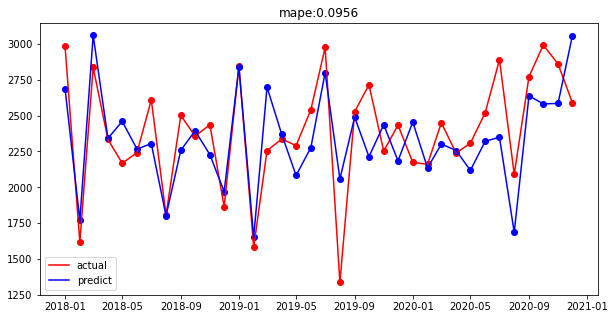

In [135]:
plt.plot(df_model.loc['2018-01-01':'2020-12-01','sum'].index,df_model.loc['2018-01-01':'2020-12-01','sum'],color = 'red')
plt.plot(df_model.index[71:107],ans_ans,color = 'blue') #3
plt.scatter(df_model.loc['2018-01-01':'2020-12-01','sum'].index,df_model.loc['2018-01-01':'2020-12-01','sum'], color = 'red')
plt.scatter(df_model.index[71:107],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])
plt.title('mape:'+str(error_percent.round(4)))

In [118]:
from sklearn.ensemble import RandomForestRegressor
X = df_model.iloc[:,1:]
y = df_model.iloc[:,0]
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
a = list(zip(X.columns,model.feature_importances_))
a.sort(key = lambda x:x[1])
a

[('covid_sc_last_month', 0.0010718196627652254),
 ('covid_sc', 0.004165027856309603),
 ('steel_sc_last_month', 0.009171034543109371),
 ('steel_sc', 0.012869985385146873),
 ('incomeaverage_sc_last_month', 0.015932642799113866),
 ('economicgrowth_sc', 0.016789700354724085),
 ('CPIT_sc', 0.017420731672157134),
 ('gdp_sc_last_month', 0.017745753552701662),
 ('lead_sc_last_month', 0.02386240679929007),
 ('oil_sc', 0.025613591018975396),
 ('oil_sc_last_month', 0.027393229730819056),
 ('signal_sc', 0.028247965827135405),
 ('lead_sc', 0.03164587153111563),
 ('gdp_sc', 0.032393437423370454),
 ('CPI_sc', 0.035496421928891415),
 ('signal_sc_last_month', 0.03657226814690976),
 ('industry_sc_last_month', 0.03889338305028831),
 ('stock_sc_last_month', 0.03933009326963),
 ('CPIT_sc_last_month', 0.042128828781545356),
 ('stock_sc', 0.04379541565165784),
 ('economicgrowth_sc_last_month', 0.045015390234419625),
 ('CPI_sc_last_month', 0.0662626033919881),
 ('last_sell', 0.08011469443796479),
 ('incomeave